In [1]:
import pandas as pd
from scipy.stats import shapiro, normaltest

In [21]:
def show_normal_tests_result(data):
    # Shapiro–Wilk test
    stat, p_value_shapiro = shapiro(data)
    print("Shapiro–Wilk test:")
    print("Test statistic:", stat)
    print("P-value:", p_value_shapiro)

    # D'Agostino's K^2 test
    stat, p_value_agostino = normaltest(data)
    print("\nD'Agostino's K^2 test:")
    print("Test statistic:", stat)
    print("P-value:", p_value_agostino)

    # Interpretation of the results
    if p_value_shapiro > 0.05:
        print("\nAccording to the Shapiro–Wilk test, the data follow a normal distribution (fail to reject H0).")
    else:
        print("\nAccording to the Shapiro–Wilk test, the data do not follow a normal distribution (reject H0).")

    if p_value_agostino > 0.05:
        print("According to D'Agostino's K^2 test, the data follow a normal distribution (fail to reject H0).")
    else:
        print("According to D'Agostino's K^2 test, the data do not follow a normal distribution (reject H0).")

In [22]:
medical_df = pd.read_csv('data/medical-charges.csv')
data = medical_df['bmi']

show_normal_tests_result(data)

Shapiro–Wilk test:
Test statistic: 0.9938864621676107
P-value: 2.60468368798344e-05

D'Agostino's K^2 test:
Test statistic: 17.581447872784118
P-value: 0.0001521377897266011

According to the Shapiro–Wilk test, the data do not follow a normal distribution (reject H0).
According to D'Agostino's K^2 test, the data do not follow a normal distribution (reject H0).


<Axes: >

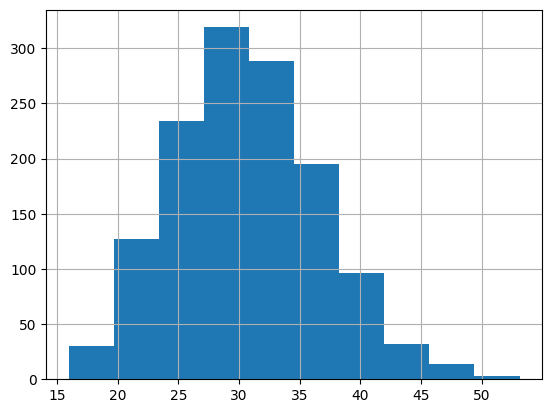

In [3]:
medical_df.bmi.hist()

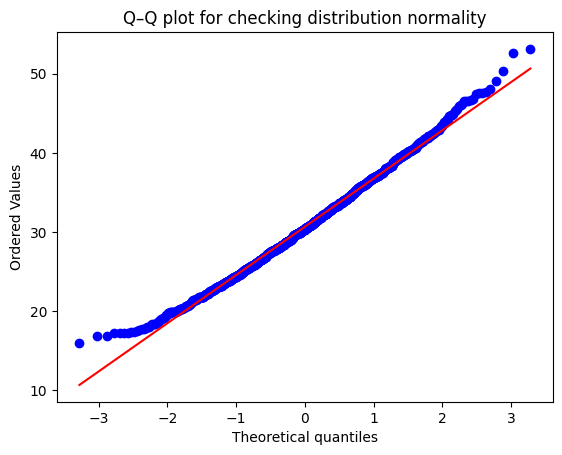

In [6]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(data, dist="norm", plot=plt)
plt.title("Q–Q plot for checking distribution normality")
plt.show()

In [11]:
import numpy as np

# Generate a random sample from a normal distribution
normal_data = np.random.normal(loc=0, scale=1, size=3000)

# Generate a random sample from a right-skewed distribution (exponential distribution)
right_skewed_data = np.random.exponential(scale=1, size=1000)

# Generate a random sample from a left-skewed distribution (negative exponential distribution)
left_skewed_data = -np.random.exponential(scale=1, size=1000)

# Generate a random sample from an under-dispersed distribution
# (truncated normal distribution) – smaller variance than a standard normal
under_dispersed_data = np.random.normal(loc=0, scale=0.5, size=1000)
under_dispersed_data = under_dispersed_data[
    (under_dispersed_data > -1) & (under_dispersed_data < 1)
]  # Truncation

# Generate a random sample from an over-dispersed distribution
# (mixture of normal distributions) – variance larger than a standard normal
over_dispersed_data = np.concatenate((
    np.random.normal(loc=-2, scale=1, size=500),
    np.random.normal(loc=2, scale=1, size=500)
))

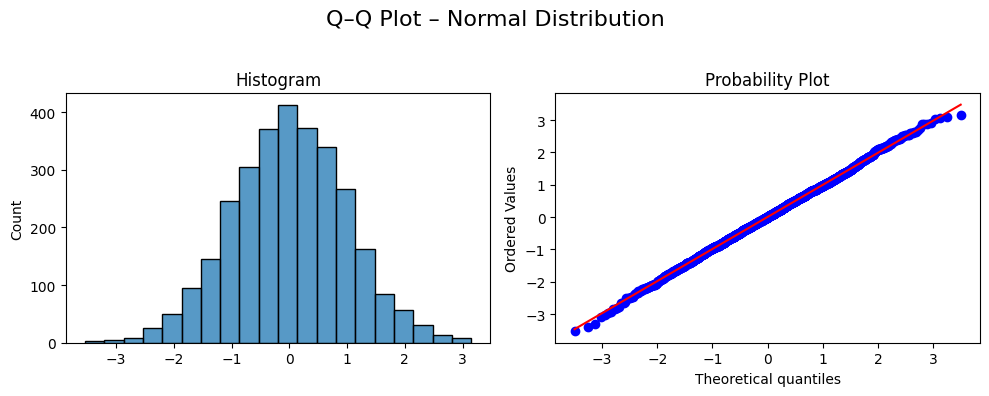

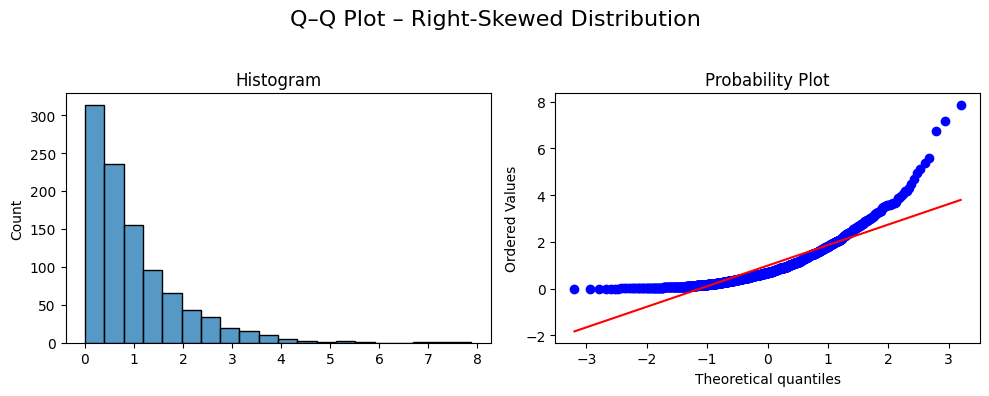

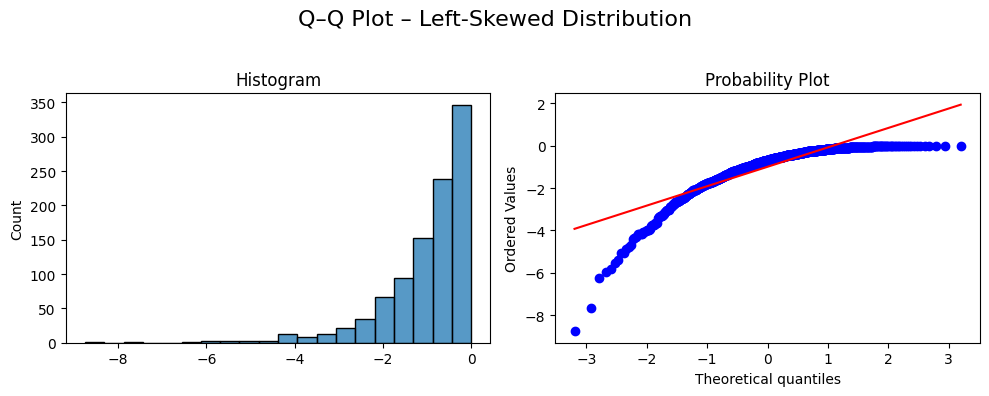

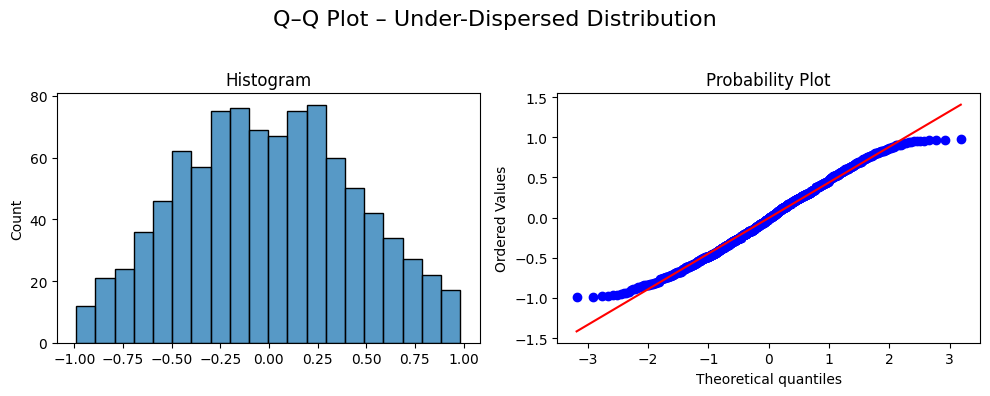

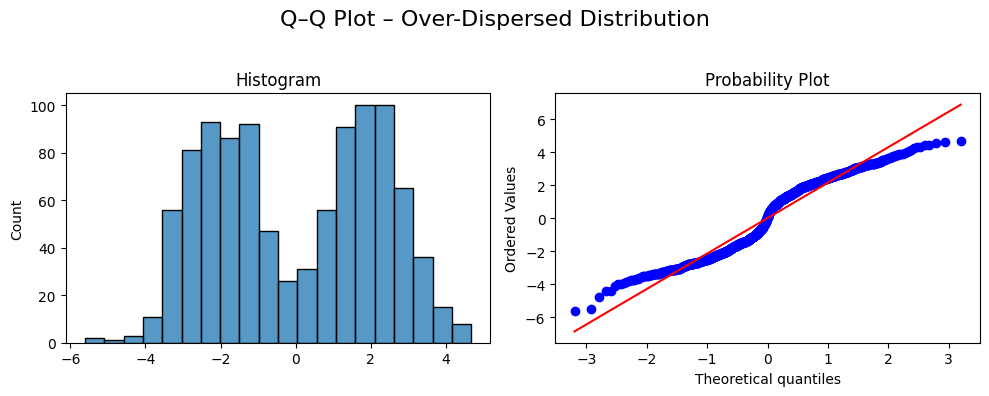

In [17]:
import seaborn as sns

def create_qq_plot(data, title):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(title, fontsize=16)

    sns.histplot(data, bins=20, ax=axs[0])
    axs[0].set_title('Histogram')

    probplot(data, dist="norm", plot=axs[1])
    axs[1].set_title('Probability Plot')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

create_qq_plot(normal_data, 'Q–Q Plot – Normal Distribution')
create_qq_plot(right_skewed_data, 'Q–Q Plot – Right-Skewed Distribution')
create_qq_plot(left_skewed_data, 'Q–Q Plot – Left-Skewed Distribution')
create_qq_plot(under_dispersed_data, 'Q–Q Plot – Under-Dispersed Distribution')
create_qq_plot(over_dispersed_data, 'Q–Q Plot – Over-Dispersed Distribution')


Shapiro–Wilk test:
Test statistic: 0.9946730405640175
P-value: 5.793887167205488e-09

D'Agostino's K^2 test:
Test statistic: 40.3821458379816
P-value: 1.7026620157597255e-09

According to the Shapiro–Wilk test, the data do not follow a normal distribution (reject H0).
According to D'Agostino's K^2 test, the data do not follow a normal distribution (reject H0).


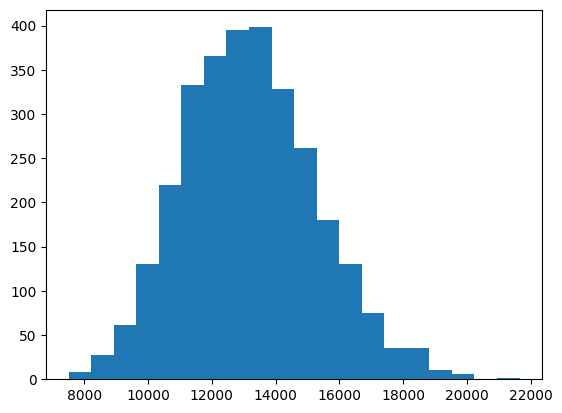

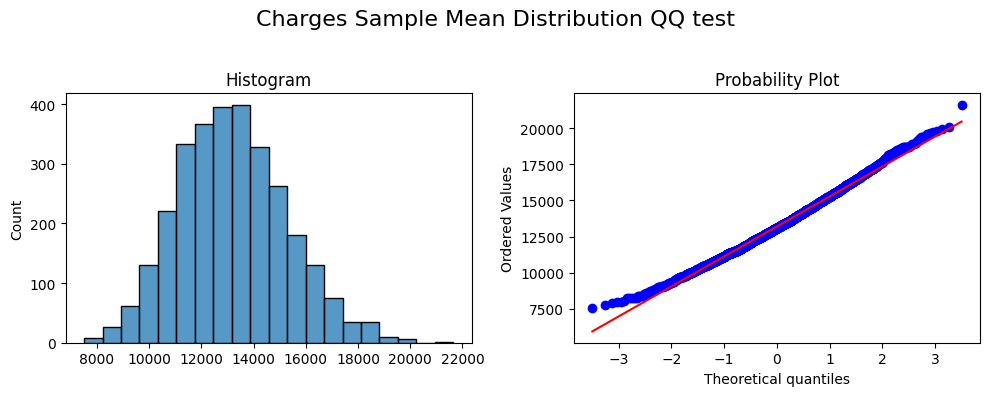

In [25]:
sample_means = []

for _ in range(3000):
    sample_means.append(medical_df['charges'].sample(33).mean())

show_normal_tests_result(sample_means)

plt.hist(sample_means, bins=20)
plt.show()

create_qq_plot(sample_means, 'Charges Sample Mean Distribution QQ test')

Shapiro–Wilk test:
Test statistic: 0.9993834716156675
P-value: 0.4439517569872803

D'Agostino's K^2 test:
Test statistic: 2.602902633723735
P-value: 0.2721365499282551

According to the Shapiro–Wilk test, the data follow a normal distribution (fail to reject H0).
According to D'Agostino's K^2 test, the data follow a normal distribution (fail to reject H0).


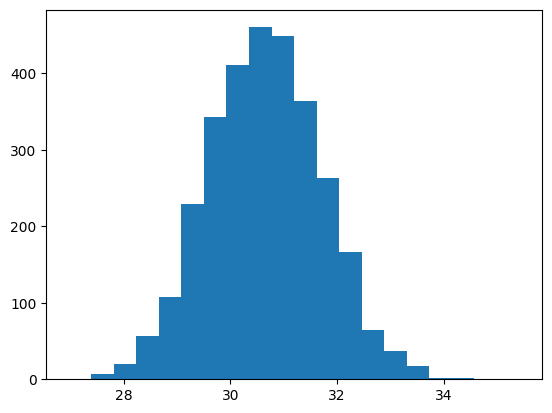

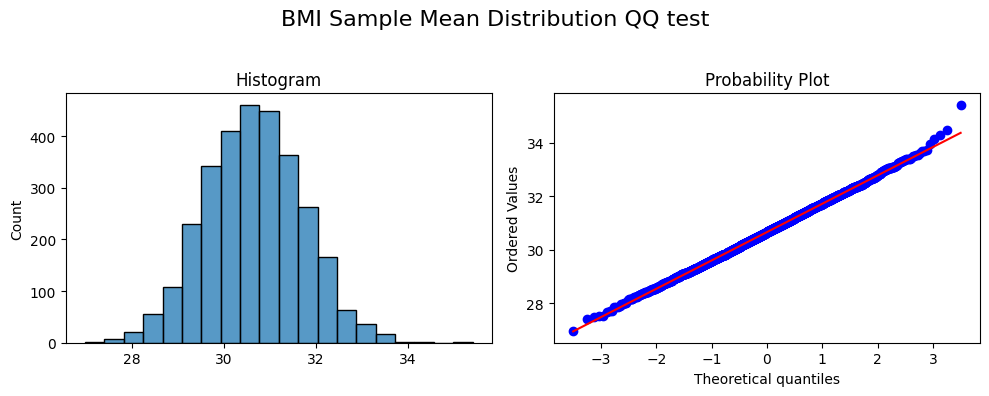

In [26]:
sample_means = []

for _ in range(3000):
    sample_means.append(medical_df['bmi'].sample(33).mean())

show_normal_tests_result(sample_means)

plt.hist(sample_means, bins=20)
plt.show()

create_qq_plot(sample_means, 'BMI Sample Mean Distribution QQ test')